<a href="https://colab.research.google.com/github/mugsiemx/deep-learning-challenge/blob/main/Charity_Funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# import the repository for the csv file
# ! git clone https://github.com/mugsiemx/deep-learning-challenge

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
# from plot_keras_history import show_history, plot_history

# #  Import and read the charity_data.csv.
# import pandas as pd 
# application_df = pd.read_csv("/Resources/charity_data.csv")
# application_df.head()

# read the CSV file from the Resources folder into a dask DataFrame
## change the data types to strings and integers
%time df = dd.read_csv('/content/deep-learning-challenge/Resources/charity_data.csv', low_memory=False,\
                       dtype={'APPLICATION_TYPE': 'string','AFFILIATION': 'string','CLASSIFICATION': 'string',\
                              'USE_CASE': 'string','ORGANIZATION': 'string','STATUS': 'int','INCOME_AMT': 'string',\
                              'SPECIAL_CONSIDERATIONS': 'string'}\
                       )
# review the DataFrame
df.dtypes, df.shape

CPU times: user 11.2 ms, sys: 1.9 ms, total: 13.1 ms
Wall time: 13.1 ms


(EIN                        int64
 NAME                      object
 APPLICATION_TYPE          string
 AFFILIATION               string
 CLASSIFICATION            string
 USE_CASE                  string
 ORGANIZATION              string
 STATUS                     int64
 INCOME_AMT                string
 SPECIAL_CONSIDERATIONS    string
 ASK_AMT                    int64
 IS_SUCCESSFUL              int64
 dtype: object,
 (Delayed('int-9f86f83c-38f1-4494-98fd-d2874528e938'), 12))

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(['EIN','NAME'], axis=1)

# dropping non-productive column(s)
df = df.drop(['INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'STATUS'], axis=1)

df.info(), df.dtypes

<class 'dask.dataframe.core.DataFrame'>
Columns: 6 entries, APPLICATION_TYPE to IS_SUCCESSFUL
dtypes: int64(1), string(5)

(None,
 APPLICATION_TYPE    string
 AFFILIATION         string
 CLASSIFICATION      string
 USE_CASE            string
 ORGANIZATION        string
 IS_SUCCESSFUL        int64
 dtype: object)

In [4]:
# create DataFrame with compute
application_df = df.compute()
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1
1,T3,Independent,C2000,Preservation,Co-operative,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1
4,T3,Independent,C1000,Heathcare,Trust,1
...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0
34297,T5,Independent,C3000,ProductDev,Association,1


In [5]:
# missing data
# application_df.isnull

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
IS_SUCCESSFUL        2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: Int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = app_counts[app_counts < 500].index.values
    
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: Int64

In [9]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C5200        1
C2600        1
C4200        1
C2190        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: Int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# listed all counts for counts in number of classifications for each classification (1000 is our 'Other' bin point)
c = ((application_df['CLASSIFICATION'].value_counts()).value_counts().sort_values(ascending=False))
c

1        26
2         5
3         3
6         3
32        2
5         2
9         2
10        2
15        2
194       1
104       1
114       1
116       1
1918      1
287       1
777       1
1883      1
75        1
4837      1
95        1
17326     1
58        1
50        1
36        1
6074      1
30        1
20        1
18        1
16        1
14        1
11        1
7         1
34        1
Name: CLASSIFICATION, dtype: Int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_counts[class_counts < 1000].index.values

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: Int64

In [12]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1
1,T3,Independent,C2000,Preservation,Co-operative,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1
4,T3,Independent,C1000,Heathcare,Trust,1
...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0
34297,T5,Independent,C3000,ProductDev,Association,1


In [13]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  string
 1   AFFILIATION       34299 non-null  string
 2   CLASSIFICATION    34299 non-null  string
 3   USE_CASE          34299 non-null  string
 4   ORGANIZATION      34299 non-null  string
 5   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(1), string(5)
memory usage: 1.6 MB


In [14]:
# # change to numeric values to view scatter plot correlations
# le = LabelEncoder()
# plot_df = application_df.copy()
# # cols = scatter_df.columns[:5]
# cols = plot_df.select_dtypes('string').columns

# for col in cols:
#   print(col)
#   category = le.fit_transform(plot_df[col])
#   print(category)
#   plot_df.drop([col], axis=1, inplace=True)
#   plot_df[col] = category

# plot_df.info()

In [15]:
# plot_df

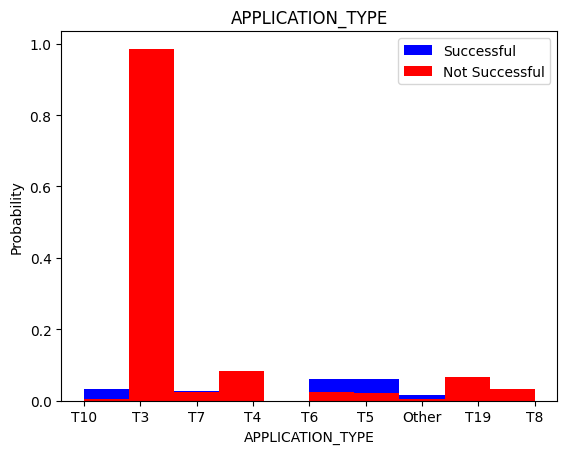

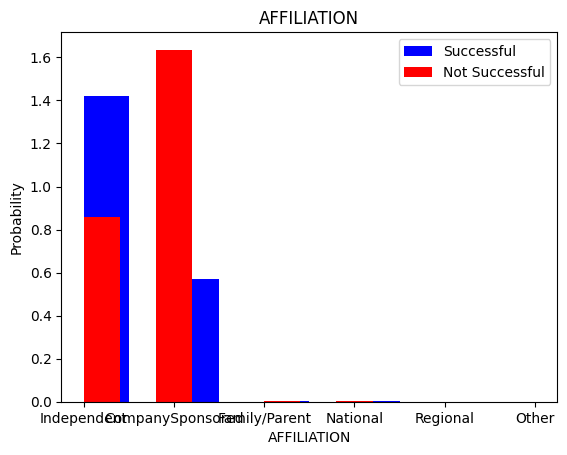

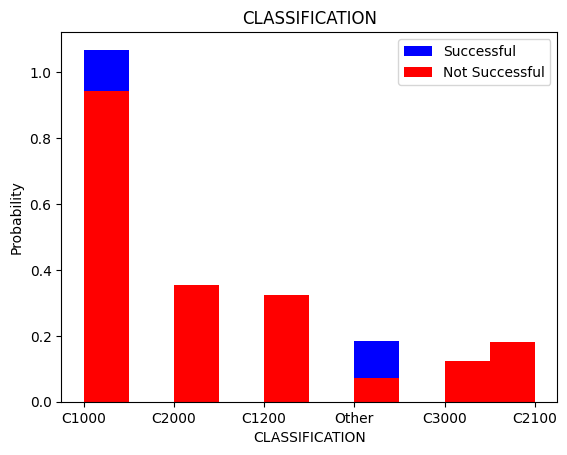

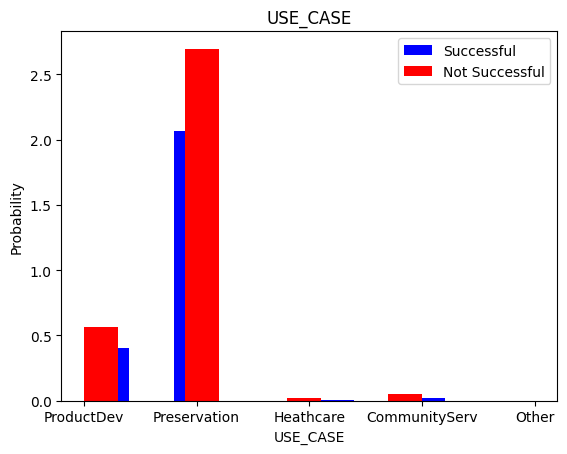

In [16]:
## graphically view the probabilities
df = application_df.copy()
cols = ['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION']

for col in cols[:-1]:
    plt.hist(df[df['IS_SUCCESSFUL']==1][col], color='blue', label='Successful', alpha=1, density='True')
    plt.hist(df[df['IS_SUCCESSFUL']==0][col], color='red', label='Not Successful', alpha=1, density='True')
    plt.title(col)
    plt.ylabel('Probability')
    plt.xlabel(col)
    plt.legend()
    plt.show()

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
clean_df = pd.get_dummies(application_df)
clean_df

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
34295,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
34296,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
34297,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [18]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   IS_SUCCESSFUL                 34299 non-null  int64
 1   APPLICATION_TYPE_Other        34299 non-null  uint8
 2   APPLICATION_TYPE_T10          34299 non-null  uint8
 3   APPLICATION_TYPE_T19          34299 non-null  uint8
 4   APPLICATION_TYPE_T3           34299 non-null  uint8
 5   APPLICATION_TYPE_T4           34299 non-null  uint8
 6   APPLICATION_TYPE_T5           34299 non-null  uint8
 7   APPLICATION_TYPE_T6           34299 non-null  uint8
 8   APPLICATION_TYPE_T7           34299 non-null  uint8
 9   APPLICATION_TYPE_T8           34299 non-null  uint8
 10  AFFILIATION_CompanySponsored  34299 non-null  uint8
 11  AFFILIATION_Family/Parent     34299 non-null  uint8
 12  AFFILIATION_Independent       34299 non-null  uint8
 13  AFFILIATION_National          3

In [19]:
df = clean_df.copy()
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# # Split our preprocessed data into our features and target arrays
# y = df.IS_SUCCESSFUL.values
# X = df.drop(columns='IS_SUCCESSFUL').values

# # Split the preprocessed data into a training and testing dataset
# # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [ ]:
## scale (normalize) the dataset to avoid skewing caused by numbers of various sizes
def scale_dataset(train, oversample=False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    # Instantiate a StandardScaler instance
    scaler = StandardScaler()

    # fit the data and transform
    X = scaler.fit_transform(X)
    
    # if we decide to use the RandomOverSampler module due to a large variance in record numbers
    ## to take more of a less class and increase the size of the dataset
    if oversample:
        ros = RandomOverSampler(sampling_strategy='minority')
        X, y = ros.fit_resample(X, y)
        
    # create one huge 2d numpy array (hstack, horizontal stack side by side)
    train = np.hstack((X, np.reshape(y, (-1,1))))
    
    # return fit and transformed data
    return train, X, y

In [ ]:
train, X_train, y_train - scale_dataset(train, oversample=True)
valid, X_valid, y_valid - scale_dataset(valid, oversample=False)
train, X_test, y_test - scale_dataset(test, oversample=False)

In [20]:
# # Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [21]:
# functions to plot the loss and accuracy
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentrophy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax1.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Binary crossentrophy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

In [22]:
# define variables for quick access to training
number_input_features = len(X_train[0])
# hidden_nodes_layer1 =  32  #80 
# hidden_nodes_layer2 = 32  #30

In [31]:
def train_model(X_train, y_train, node, dropout_probability, learning_rate, batch_size, epochs):
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
  nn = tf.keras.models.Sequential([
  # First hidden layer
      tf.keras.layers.Dense(units=node, input_dim=number_input_features, activation="relu"),
  # Second hidden layer
      tf.keras.layers.Dense(units=node, activation="relu"),
  # add dropout for later testing
      tf.keras.layers.Dropout(dropout_probability),
  # Output layer
      tf.keras.layers.Dense(units=1, activation="sigmoid")
  ])
  # Check the structure of the model
  nn.summary()

  # Compile the model
  nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss="binary_crossentropy", metrics=["accuracy"])

  # Train the model
  history = nn.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)

  return nn, history

16 nodes, dropout 0, lr 0.01, batch size 32
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                496       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


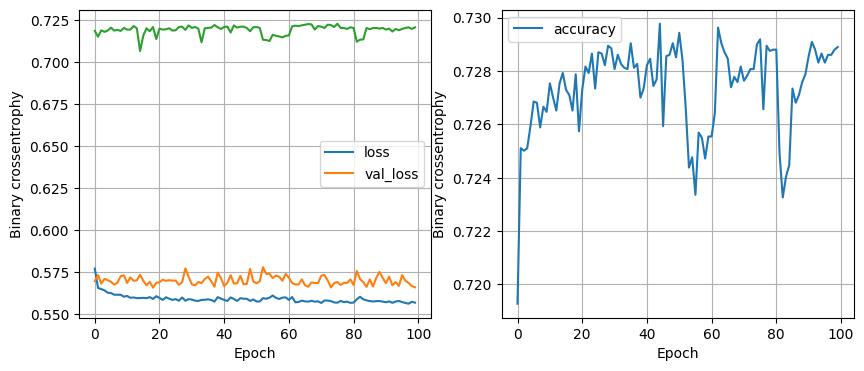

268/268 - 0s - loss: 0.5601 - accuracy: 0.7223 - 239ms/epoch - 892us/step


TypeError: ignored

In [32]:
epochs = 100
nodes = [16, 32, 64]
dropout_probabilities = [0, 0.2]
learning_rates = [0.01, 0.005, 0.001]
batch_sizes = [32, 64, 128]

# view the loss and accuracy of model
least_val_loss = float('inf')
least_loss_model = None

for node in nodes:
  for dropout_probability in dropout_probabilities:
    for learning_rate in learning_rates:
      for batch_size in batch_sizes:
        print(f'{node} nodes, dropout {dropout_probability}, lr {learning_rate}, batch size {batch_size}')
        nn, history = train_model(X_train, y_train, node, dropout_probability, learning_rate, batch_size, epochs)
        plot_history(history)
        val_loss = nn.evaluate(X_test_scaled,y_test,verbose=2)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = nn



In [ ]:
plot_history(history)

In [ ]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
# original run
# 268/268 - 0s - loss: 0.5545 - accuracy: 0.7272 - 351ms/epoch - 1ms/step
# Loss: 0.5544604063034058, Accuracy: 0.7272303104400635

In [ ]:
# Export our model to HDF5 file
# fit_model.save("model_1st_good_run_.h5")
# keras.callbacks.ModelCheckpoint() # to save the best model